In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import average_precision_score

import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
val_data = pd.read_csv('validation.csv')

train_data = train_data.dropna()
test_data = test_data.dropna()
val_data = val_data.dropna()

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['message'])
X_val = vectorizer.transform(val_data['message'])
X_test = vectorizer.transform(test_data['message'])

y_train, y_val, y_test = train_data['label'], val_data['label'], test_data['label']


In [3]:
def tune_hyperparameters(model, param_grid, X_train, y_train, X_val, y_val, test="Validation"):
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate best model
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)
    
    train_metrics = round(average_precision_score(y_train, train_preds), 3)
    val_metrics = round(average_precision_score(y_val, val_preds), 3)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Train Metrics: {train_metrics}')
    print(f'{test} Metrics: {val_metrics}')

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Train', test], y=[train_metrics, val_metrics], palette="Blues_r")

    plt.ylim(0, 1)
    plt.ylabel("AUCPR Score")
    plt.title(f"Train vs {test} AUCPR")
    plt.show()
    plt.show()

    return best_model


In [4]:
def validate_model(model, X_train, y_train, X_val, y_val, test="Validation"):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_metrics = round(average_precision_score(y_train, train_preds), 3)
    val_metrics = round(average_precision_score(y_val, val_preds), 3)
    print(f'Train Metrics: {train_metrics}')
    print(f'{test} Metrics: {val_metrics}')

    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Train', test], y=[train_metrics, val_metrics], palette="Blues_r")

    plt.ylim(0, 1)
    plt.ylabel("AUCPR Score")
    plt.title(f"Train vs {test} AUCPR")
    plt.show()


    return {"Train": train_metrics, test: val_metrics}

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Train Metrics: 0.996
Validation Metrics: 0.821


C:\Users\X Warrior\AppData\Local\Temp\ipykernel_6432\3736296483.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', test], y=[train_metrics, val_metrics], palette="Blues_r")


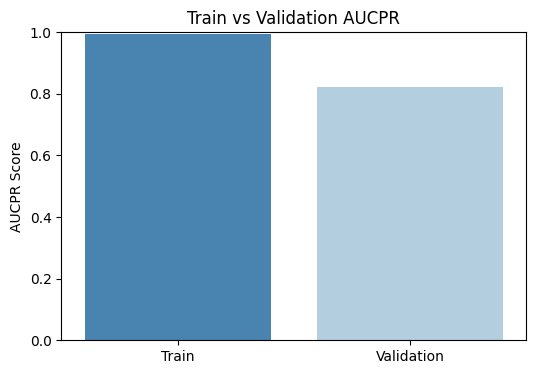

In [5]:
hyperparameters =  {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
    }

model = RandomForestClassifier()

best_model = tune_hyperparameters(model, hyperparameters, X_train, y_train, X_val, y_val)
        



In [7]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']